# OptiRoute Mumbai: Genetic Algorithm-based Route Optimization

-> Mumbai cities
Altamount Road*
Bandstand Promenade* (bandra west)
Marine Drive, Mumbai*
Nana Chowk*
Girgaon Chowpatty*
Shri Waleshwar Temple*
Nepean Sea Road*
P L Lokhande Marg*
Princess Street (Mumbai)*
Golibar*
Sion Causeway*
Dadabhai Naoroji Road*
Lamington Road*
Breach Candy*
Tardeo*
Cumballa hill*
Gowalia Tank*
Pedder Road*
Linking Road*
Colaba Causeway*
Railway Road*
IIT Bombay*
Pali Hill*
Elephanta Caves*
Gateway Of India*
Global Vipassana Pagoda*
Mahim Fort*
Chhatrapati Shivaji Terminus*
Haji Ali Dargah*
Siddhivinayak Temple*
Prince Of Wales Museum*
Flora Fountain*
Sanjay Gandhi National Park*
Navi Mumbai*
Vasai Fort*
Karjat*
Vasai*
Virar*
Global Vipassana Pagoda*
Mahim Fort*
Mantralaya*
Bandra-Worli Sea Link*
Elephanta Island*
*(Borivali)
Warli*
Ulhasnagar*
Lion Gate Mumbai*
Panvel*
Kalbadevi*
Bhuleshwar*
Carmichael Road
Chembur Causeway
Colaba Causeway
Dalal Street
Fashion Street
Hill Road, Mumbai
Hughes Road
Jeejabai Bhosle Marg*
Lady Jamshetjee Road*
Mahim Causeway*

In [35]:
#we have just selected 62 major cities/Town of Mumbai and scraped all the data (ie lattitue from North and  Longitude from East) from google
city_data = {
    "Tardeo": (18.9676, 72.8141),
    "Bhuleshwar": (18.9562, 72.8296),
    "Bandra West": (19.0596, 72.8295),
    "Kalbadevi": (18.9487, 72.8289),
    "Panvel": (18.9894, 73.1175),
    "Lion Gate Mumbai": (18.9275, 72.8335),
    "Ulhasnagar": (19.2215, 73.1645),
    "Warli": (18.9986, 72.8174),
    "Borivali": (19.2307, 72.8567),
    "Elephanta Island": (18.9608, 72.9313),
    "Bandra-Worli Sea Link": (19.0365, 72.8173),
    "Mantralaya": (18.9290, 72.8301),
    "Mahim Fort": (19.0420, 72.8382),
    "Global Vipassana Pagoda": (19.2282, 72.8059),
    "Virar": (19.4564, 72.7925),
    "Vasai": (19.3919, 72.8397),
    "Vasai Fort": (19.3305, 72.8156),
    "Karjat": (18.9102, 73.3283),
    "Navi Mumbai": (19.0330, 73.0297),
    "Sanjay Gandhi National Park": (19.2205, 72.9128),
    "IIT Bombay": (19.1334, 72.9133),
    "Flora Fountain": (18.9324, 72.8315),
    "Prince Of Wales Museum": (18.9269, 72.8327),
    "Siddhivinayak Temple": (19.1166, 72.8342),
    "Haji Ali Dargah": (18.9827, 72.8089),
    "Chhatrapati Shivaji Terminus": (18.9398, 72.8354),
    "Global Vipassana Pagoda": (19.2282, 72.8059),
    "Gateway Of India": (18.9220, 72.8347),
    "Pali Hills": (19.0674, 72.8262),
    "Railway Road": (18.9696, 72.8193),
    "Elephanta Caves": (18.9633, 72.9315),
    "Colaba Causeway": (18.913563, 72.823321),
    "Linking Road": (19.063966, 72.835624),
    "Breach Candy": (18.9746, 72.8065),
    "Peddar Road": (18.968249, 72.807385),
    "Gowalia Tank": (18.9623, 72.8101),
    "Tardeo": (18.9676, 72.8141),
    "Cumballa hill": (18.9705055, 72.805744),
    "Chhatrapati Shivaji International Airport": (19.0902, 72.8628),
    "Lamington Road": (18.961511, 72.817736),
    "Dadabhai Naoroji Road": (18.9325, 72.8317),
    "Kamathipura": (18.9649, 72.8261),
    "budhwar peth": (18.5159, 73.8580),
    "Nagpada": (18.9641, 72.8305),
    "Hutatma Chowk": (18.9327, 72.8316),
    "Oriental Building": (18.9335, 72.8317),
    "Bombay Mutual Building": (18.9348, 72.8334),
    "Sion Causeway": (19.035288, 72.867119),
    "Princess Street (Mumbai)": (19.0167, 72.85),
    "Golibar": (19.0773, 72.8439),
    "Shri Waleshwar Temple": (18.54035, 73.79405),
    "Nepean Sea Rd": (18.957534, 72.799986),
    "Girgaon Chowpatty": (18.9519, 72.8166),
    "Nana Chowk": (18.51292, 73.864),
    "aksa beach": (19.1760, 72.7954),
    "Charni Road": (18.9518, 72.8184),
    "Marine Drive": (18.941482, 72.823679),
    "Mahim Causeway": (19.047304, 72.837819),
    "Lady Jamshetjee Road": (19.040432, 72.840955),
    "Hill Road, Mumbai": (19.0547318, 72.8259277),
    "Fashion Street": (18.9389, 72.8301),
    "Phiroze Jeejeebhoy Towers": (18.929863, 72.833427),
    "Chembur Causeway": (19.032801, 72.896355),
    "Carmichael Road": (19.076090, 72.877426)
}


In [36]:
print(len(city_data))

62


In [46]:
!pip install folium

In [59]:
import random
import matplotlib.pyplot as plt
import folium

# Genetic Algorithm Parameters
population_size = 50
generations = 5000
mutation_rate = 0.5

# Generate initial random population
def generate_individual():
    return random.sample(list(city_data.keys()), len(city_data))

population = [generate_individual() for _ in range(population_size)]

# Calculate total distance of a path
def calculate_distance(path):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = city_data[path[i]]
        city2 = city_data[path[i + 1]]
        distance = ((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)**0.5
        total_distance += distance
    return total_distance

# Perform selection, crossover, and mutation
def evolve_population(population):
    population.sort(key=lambda path: calculate_distance(path))
    parents = population[:population_size // 2]
    
    new_generation = parents.copy()
    while len(new_generation) < population_size:
        parent1, parent2 = random.sample(parents, 2)
        crossover_point = random.randint(1, len(city_data) - 2)
        child = parent1[:crossover_point] + [gene for gene in parent2 if gene not in parent1[:crossover_point]]
        new_generation.append(child)
    
    for i in range(1, population_size):
        if random.random() < mutation_rate:
            index1, index2 = random.sample(range(len(city_data)), 2)
            new_generation[i][index1], new_generation[i][index2] = new_generation[i][index2], new_generation[i][index1]
    
    return new_generation

# Main loop
# Iterate the process until we get the best solution
best_distance = float('inf')
best_route = []
for generation in range(generations):
    population = evolve_population(population)
    current_best_distance = calculate_distance(population[0])
    if current_best_distance < best_distance:
        best_distance = current_best_distance
        best_route = population[0]

    print(f"Generation {generation + 1} - Best Distance: {best_distance:.2f}")


Generation 1 - Best Distance: 11.69
Generation 2 - Best Distance: 11.69
Generation 3 - Best Distance: 11.69
Generation 4 - Best Distance: 11.24
Generation 5 - Best Distance: 10.94
Generation 6 - Best Distance: 10.94
Generation 7 - Best Distance: 10.80
Generation 8 - Best Distance: 10.76
Generation 9 - Best Distance: 10.39
Generation 10 - Best Distance: 10.33
Generation 11 - Best Distance: 10.33
Generation 12 - Best Distance: 9.78
Generation 13 - Best Distance: 9.78
Generation 14 - Best Distance: 9.71
Generation 15 - Best Distance: 9.35
Generation 16 - Best Distance: 9.35
Generation 17 - Best Distance: 9.35
Generation 18 - Best Distance: 9.35
Generation 19 - Best Distance: 9.34
Generation 20 - Best Distance: 9.34
Generation 21 - Best Distance: 7.38
Generation 22 - Best Distance: 7.38
Generation 23 - Best Distance: 7.26
Generation 24 - Best Distance: 7.26
Generation 25 - Best Distance: 7.07
Generation 26 - Best Distance: 7.07
Generation 27 - Best Distance: 7.07
Generation 28 - Best Dista

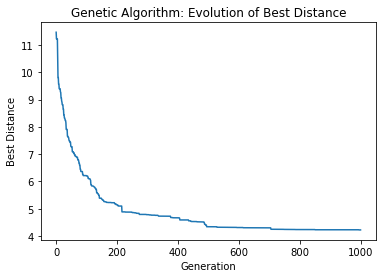

In [60]:
# Plotting the best distance evolution
plt.plot(best_distances)
plt.xlabel('Generation')
plt.ylabel('Best Distance')
plt.title('Genetic Algorithm: Evolution of Best Distance')
plt.show()

In [64]:
# Print optimized route
print("Optimized Route: Starting From.. ")
for i,city in enumerate(best_route):
    print(f"{i+1}). {city}")

Optimized Route: Starting From.. 
1). Ulhasnagar
2). Sanjay Gandhi National Park
3). IIT Bombay
4). Siddhivinayak Temple
5). Pali Hills
6). Bandra West
7). Hill Road, Mumbai
8). Bandra-Worli Sea Link
9). Warli
10). Haji Ali Dargah
11). Breach Candy
12). Cumballa hill
13). Peddar Road
14). Gowalia Tank
15). Tardeo
16). Railway Road
17). Lamington Road
18). Kamathipura
19). Nagpada
20). Princess Street (Mumbai)
21). Lady Jamshetjee Road
22). Mahim Fort
23). Mahim Causeway
24). Linking Road
25). Golibar
26). Chhatrapati Shivaji International Airport
27). Carmichael Road
28). Sion Causeway
29). Bhuleshwar
30). Kalbadevi
31). Charni Road
32). Girgaon Chowpatty
33). Marine Drive
34). Fashion Street
35). Chhatrapati Shivaji Terminus
36). Bombay Mutual Building
37). Oriental Building
38). Hutatma Chowk
39). Dadabhai Naoroji Road
40). Flora Fountain
41). Phiroze Jeejeebhoy Towers
42). Mantralaya
43). Prince Of Wales Museum
44). Lion Gate Mumbai
45). Gateway Of India
46). Colaba Causeway
47). Ne

In [65]:
# Using Folium to Visualize optimized routes interactively using dynamic geographic mapping
import random
import folium

# Find the best route after optimization
best_route = population[0]

# Create a folium map to visualize the route
m = folium.Map(location=[city_data[best_route[0]][0], city_data[best_route[0]][1]], zoom_start=12)

for i in range(len(best_route) - 1):
    start_city = best_route[i]
    end_city = best_route[i + 1]
    folium.PolyLine([city_data[start_city], city_data[end_city]], color="blue").add_to(m)

# Add labels and title using HTML
html = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Optimized Path Connecting Cities</title>
</head>
<body>
    <h2>Optimized Path Connecting Cities</h2>
    <p>Best Route: {', '.join(best_route)}</p>
</body>
</html>
"""
folium.Html(html, script=True).add_to(m)

# Save the map as an HTML file
m.save("optimized_route_map.html")
print("Map saved as optimized_route_map.html")

Map saved as optimized_route_map.html


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


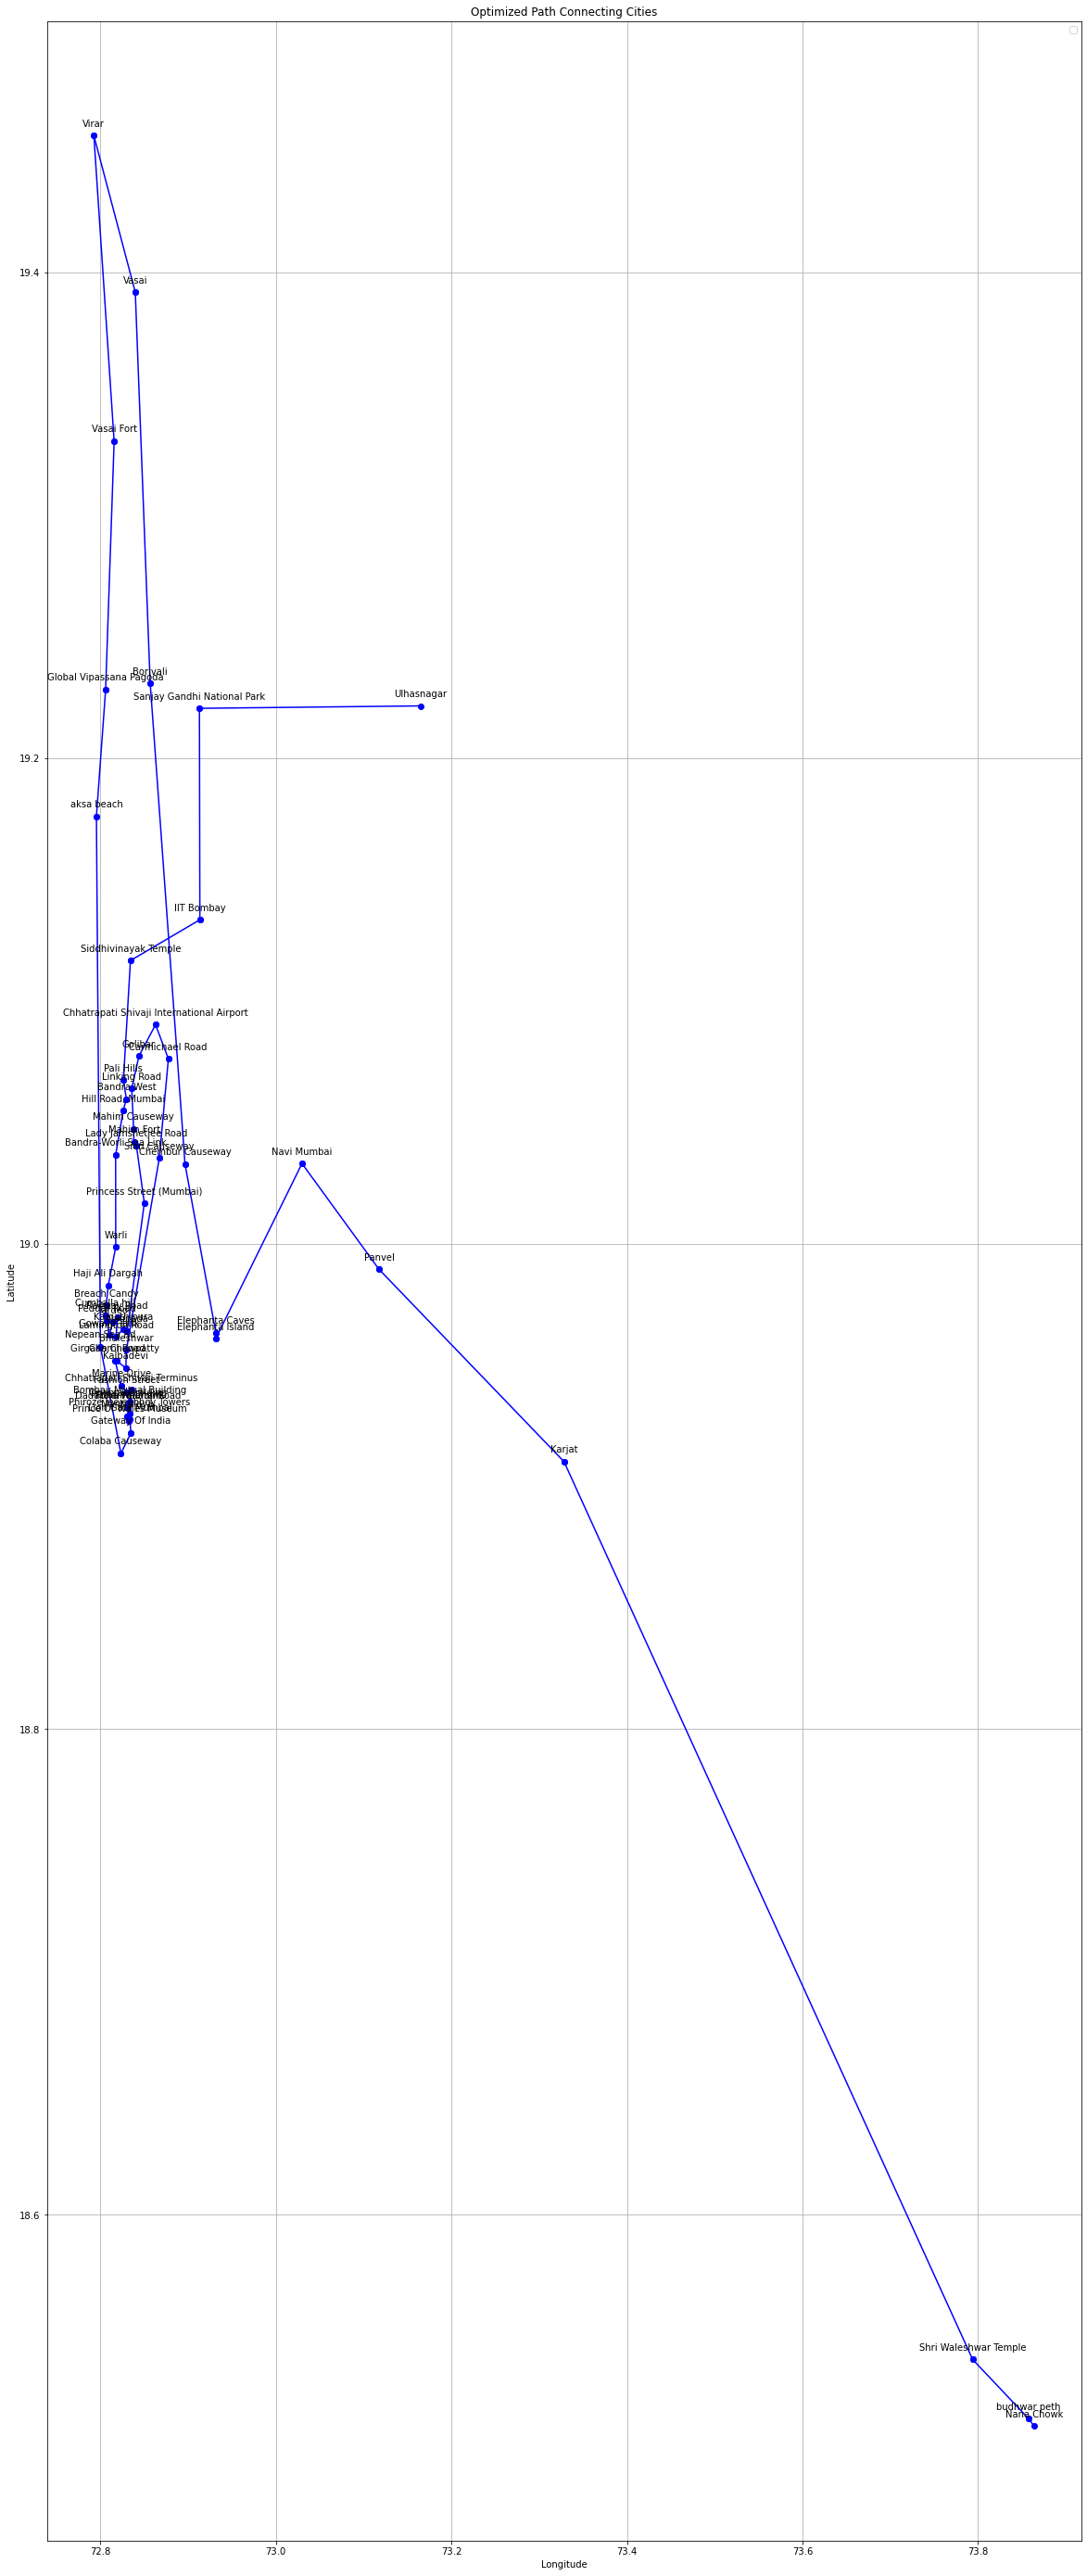

In [66]:
# ... Plotting Optimized Route in Matplotlib

# Set the figure size
plt.figure(figsize=(20, 50))  # Adjust the width and height as needed

# Annotate each city with its name
for i, city in enumerate(best_route):
    lat, lon = city_data[city]
    plt.annotate(f'{city}', (lon, lat), textcoords="offset points", xytext=(0, 10), ha='center')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Optimized Path Connecting Cities')

# Display the best route using Matplotlib
for i in range(len(best_route) - 1):
    start_city = best_route[i]
    end_city = best_route[i + 1]
    plt.plot([city_data[start_city][1], city_data[end_city][1]],
             [city_data[start_city][0], city_data[end_city][0]],
             marker='o', linestyle='-', color='blue')

# Display the path
plt.legend()
plt.grid()
plt.show()
